# SP 500

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='grade3')

In [3]:
df_sp500 = pd.read_csv('../input/sp500_data.csv')
df_sp500.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


## PCA: two companies

In [4]:
X = df_sp500[['CVX', 'XOM']].values
X

array([[ 0.07292086, -0.01699089],
       [ 0.10208921,  0.01699089],
       [ 0.02916834,  0.08495444],
       ...,
       [-0.809998  , -0.230003  ],
       [-0.979996  , -0.540001  ],
       [-0.210007  , -0.909996  ]])

Text(0,0.5,'XOM')

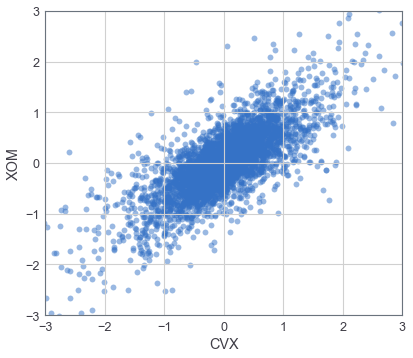

In [23]:
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('CVX')
plt.ylabel('XOM')

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca.components_

array([[-0.74710069, -0.66471089],
       [-0.66471089,  0.74710069]])

In [16]:
Z = pca.transform(X)
Z

array([[-0.02766642, -0.07261135],
       [-0.07204617, -0.06661206],
       [-0.06274305,  0.03263485],
       ...,
       [ 0.77355434,  0.35513294],
       [ 1.10661901,  0.23653274],
       [ 0.7772994 , -0.55171085]])

Text(0,0.5,'Z_1')

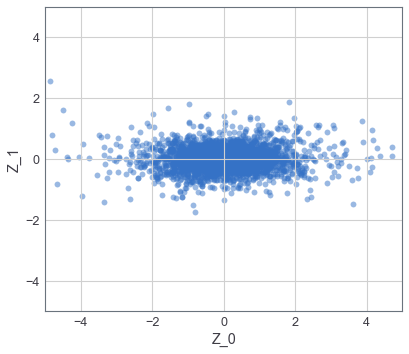

In [24]:
plt.scatter(Z[:,0], Z[:,1], alpha=0.5)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('Z_0')
plt.ylabel('Z_1')

(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,
          1.,   2.,   3.,   2.,   3.,   3.,   5.,   3.,   2.,   9.,   8.,
          2.,  14.,   8.,  14.,  22.,  19.,  38.,  38.,  33.,  67.,  74.,
         83., 115., 149., 198., 228., 274., 335., 472., 519., 523., 464.,
        384., 335., 209., 187., 165., 113.,  88.,  86.,  65.,  48.,  43.,
         35.,  31.,  15.,  15.,  12.,   6.,  13.,   7.,   6.,   6.,   5.,
          9.,   8.,   2.,   4.,   1.,   1.,   2.,   2.,   1.,   2.,   0.,
          1.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.87023202, -1.82594684, -1.78166167, -1.73737649, -1.69309132,
        -1.64880614, -1.60452097, -1.5602358 , -1.51595062, -1.47166545,
        -1.42738027, -1.3830951 , -1.33880992, -1.29452475, -1.25023957,
        -1.2059544 , -1.16166922, -1.11738405, -1.07309888, -1.0288137 ,
        -0.98452853, -0.94

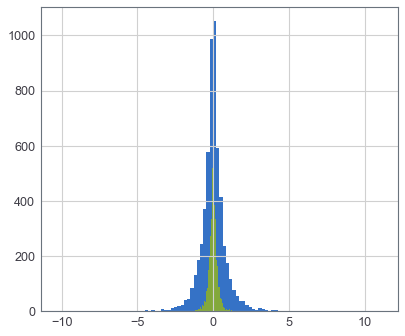

In [18]:
plt.hist(Z[:,0], bins=100)
plt.hist(Z[:,1], bins=100)

## PCA: more companies

In [46]:
X = df_sp500[df_sp500[df_sp500.columns[0]]>='2005-01-01'][['AAPL', 'MSFT', 'CSCO', 'INTC', 
    'CVX', 'XOM', 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']].values
X

array([[-0.09997328, -0.04783466, -0.08926277, ..., -0.72432897,
         0.08459416, -0.27334612],
       [ 0.01006046, -0.02391853, -0.73195479, ..., -0.75763232,
        -0.53065771, -0.92455146],
       [ 0.00267717, -0.04783466,  0.08926367, ..., -0.12488528,
        -0.26148237,  0.03215917],
       ...,
       [-0.93      , -0.670002  , -0.44655762, ..., -1.390007  ,
        -1.019997  , -1.319993  ],
       [-0.14      , -0.559997  , -0.36717141, ..., -1.020005  ,
        -0.020005  , -1.320007  ],
       [-0.300004  , -0.009998  , -0.07      , ...,  0.89      ,
        -0.379997  ,  0.700012  ]])

In [47]:
pca = PCA()
pca.fit(X)
comp = pca.explained_variance_
load = pca.components_

Text(0.5,0,'Components')

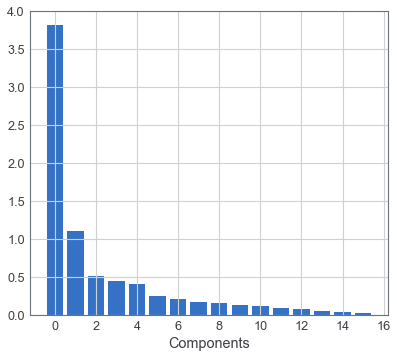

In [48]:
plt.bar(range(len(comp)), comp)
plt.xlabel('Components')

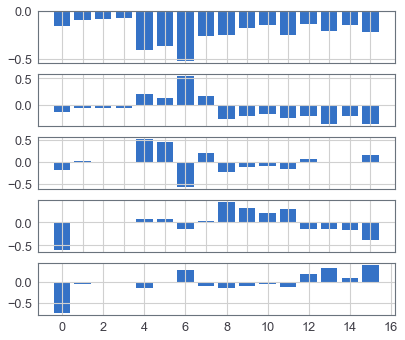

In [57]:
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.bar(range(len(X[0])), load[i].ravel())
    if i < 4:
        plt.xticks(range(len(X[0])), ['']*len(X[0]))

## K-Means Clustering: two companies

In [59]:
X = df_sp500[df_sp500[df_sp500.columns[0]]>='2011-01-01'][['XOM','CVX']].values
X

array([[ 0.73680496,  0.24068086],
       [ 0.16866845, -0.5845157 ],
       [ 0.02663055,  0.44698537],
       ...,
       [-0.230003  , -0.809998  ],
       [-0.540001  , -0.979996  ],
       [-0.909996  , -0.210007  ]])

Text(0,0.5,'CVX')

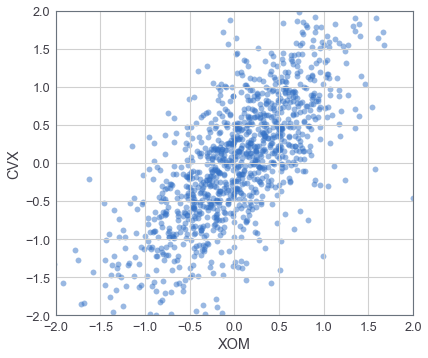

In [75]:
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('XOM')
plt.ylabel('CVX')

In [62]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
km.fit(X)
km.cluster_centers_

array([[-0.32848643, -0.56691353],
       [ 0.24251909,  0.33647932],
       [ 0.96094768,  1.37657213],
       [-1.14398   , -1.75029747]])

Text(0,0.5,'CVX')

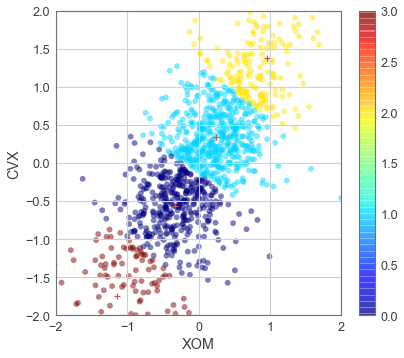

In [76]:
plt.scatter(X[:,0], X[:,1], c=np.argmin(km.transform(X), axis=1), cmap='jet', alpha=0.5)
plt.colorbar()
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='r', marker='+')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('XOM')
plt.ylabel('CVX')


In [65]:
km.transform(X)

array([[1.33680755, 0.50348373, 1.15779486, 2.73885867],
       [0.49746639, 0.92395116, 2.11508199, 1.75558911],
       [1.07429002, 0.24252721, 1.31798332, 2.48965479],
       ...,
       [0.26227666, 1.24003523, 2.48986997, 1.31130357],
       [0.46408571, 1.53148456, 2.79396856, 0.97885392],
       [0.68230173, 1.27551493, 2.45309266, 1.55796125]])

## K-Means Clustering: more companies

In [77]:
X = df_sp500[df_sp500[df_sp500.columns[0]]>='2011-01-01'][['AAPL', 'MSFT', 'CSCO', 'INTC', 
    'CVX', 'XOM', 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']].values
X

array([[ 0.52736793, -0.06180463,  0.03570422, ...,  0.45564598,
         0.099184  , -0.24060496],
       [-0.15432072,  0.13243951,  0.00892628, ..., -0.5807203 ,
        -0.54100545, -0.17185873],
       [ 0.59715204,  0.08829359,  0.16959928, ..., -0.48244768,
        -0.05409856, -0.85930652],
       ...,
       [-0.93      , -0.670002  , -0.44655762, ..., -1.390007  ,
        -1.019997  , -1.319993  ],
       [-0.14      , -0.559997  , -0.36717141, ..., -1.020005  ,
        -0.020005  , -1.320007  ],
       [-0.300004  , -0.009998  , -0.07      , ...,  0.89      ,
        -0.379997  ,  0.700012  ]])

In [83]:
km = KMeans(n_clusters=5)
km.fit(X)
cl_index = km.predict(X)
unique_elements, counts_elements = np.unique(cl_index, return_counts=True)
print(unique_elements, counts_elements)

[0 1 2 3 4] [256 190 293 105 287]


Text(0,0.5,'Counts')

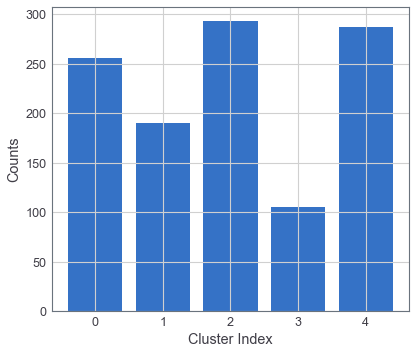

In [85]:
plt.bar(range(5), counts_elements)
plt.xlabel('Cluster Index')
plt.ylabel('Counts')

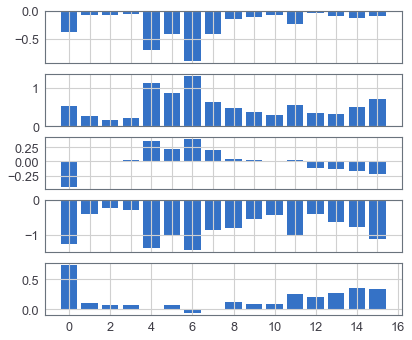

In [88]:
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.bar(range(len(X[0])), km.cluster_centers_[i])
    if i < 4:
        plt.xticks(range(len(X[0])), ['']*len(X[0]))

In [90]:
scores = []
for nC in range(2, 15):
    km = KMeans(n_clusters=nC)
    km.fit(X)
    scores.append(km.score(X))

Text(0,0.5,'Score')

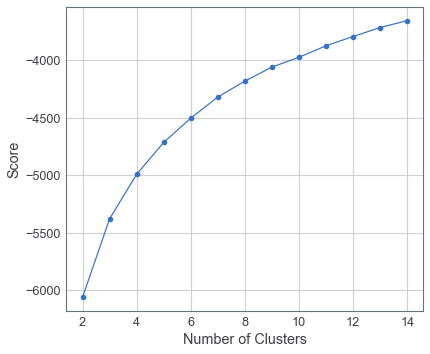

In [93]:
plt.plot(range(2,15), scores, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

## Hierarchical Clustering

In [94]:
X = df_sp500[['XOM', 'CVX']].values
X

array([[-0.01699089,  0.07292086],
       [ 0.01699089,  0.10208921],
       [ 0.08495444,  0.02916834],
       ...,
       [-0.230003  , -0.809998  ],
       [-0.540001  , -0.979996  ],
       [-0.909996  , -0.210007  ]])

In [96]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=4)
agc.fit_predict(X)

array([2, 2, 2, ..., 0, 0, 0])

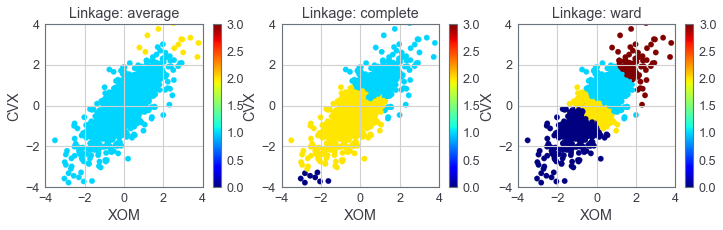

In [103]:
linkage = ['average', 'complete', 'ward']
plt.figure(figsize=(12,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    agc = AgglomerativeClustering(n_clusters=4, linkage=linkage[i])
    plt.scatter(X[:,0], X[:,1], c=agc.fit_predict(X), cmap='jet')
    plt.title('Linkage: {}'.format(linkage[i]))
    plt.xlim([-4,4])
    plt.ylim([-4,4])
    plt.xlabel('XOM')
    plt.ylabel('CVX')
    plt.colorbar()

## Model-Based Clustering

In [104]:
X = df_sp500[['XOM', 'CVX']].values
X

array([[-0.01699089,  0.07292086],
       [ 0.01699089,  0.10208921],
       [ 0.08495444,  0.02916834],
       ...,
       [-0.230003  , -0.809998  ],
       [-0.540001  , -0.979996  ],
       [-0.909996  , -0.210007  ]])

In [111]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(min_samples=200)
dbs.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

(-3, 3)

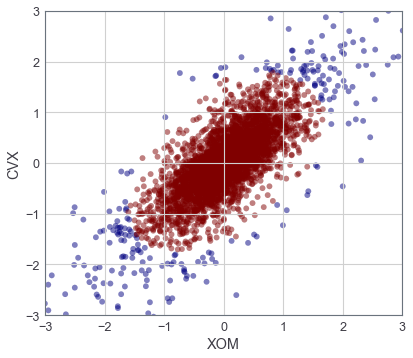

In [112]:
plt.scatter(X[:,0], X[:,1], c=dbs.fit_predict(X), cmap='jet', alpha=0.5)
plt.xlabel('XOM')
plt.ylabel('CVX')
plt.xlim([-3,3])
plt.ylim([-3,3])

# Loan

In [128]:
df_loan = pd.read_csv('../input/loan_data.csv')
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 21 columns):
Unnamed: 0           45342 non-null int64
status               45342 non-null object
loan_amnt            45342 non-null int64
term                 45342 non-null object
annual_inc           45342 non-null int64
dti                  45342 non-null float64
payment_inc_ratio    45342 non-null float64
revol_bal            45342 non-null int64
revol_util           45342 non-null float64
purpose              45342 non-null object
home_ownership       45342 non-null object
delinq_2yrs_zero     45342 non-null int64
pub_rec_zero         45342 non-null int64
open_acc             45342 non-null int64
grade                45342 non-null float64
outcome              45342 non-null object
emp_length           45342 non-null int64
purpose_             45342 non-null object
home_                45342 non-null object
emp_len_             45342 non-null object
borrower_score       45342 non-null

## Scaling Variables

In [115]:
X = df_loan[['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 'dti', 'revol_util']].values
X

array([[2.5000e+03, 3.0000e+04, 1.6870e+03, 3.0000e+00, 1.0000e+00,
        9.4000e+00],
       [5.6000e+03, 4.0000e+04, 5.2100e+03, 1.1000e+01, 5.5500e+00,
        3.2600e+01],
       [5.3750e+03, 1.5000e+04, 9.2790e+03, 2.0000e+00, 1.8080e+01,
        3.6500e+01],
       ...,
       [4.3750e+03, 2.0000e+04, 6.5740e+03, 8.0000e+00, 7.9500e+00,
        7.3000e+01],
       [8.0000e+03, 4.8000e+04, 1.0303e+04, 1.0000e+01, 2.6910e+01,
        3.2400e+01],
       [3.5000e+04, 1.0000e+05, 1.6676e+04, 1.3000e+01, 7.8200e+00,
        9.1600e+01]])

In [119]:
km = KMeans(n_clusters=4)
km.fit(X)
X_0 = km.predict(X)
X_0

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [129]:
df_loan['KMeans'] = X_0
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score,KMeans
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65,1
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80,1
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,2,6.0,default,1,other,RENT,> 1 Year,0.60,1
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50,1
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,14,5.4,default,4,other,RENT,> 1 Year,0.55,0


In [132]:
df_loan.groupby(['KMeans'])[['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 'dti', 
         'revol_util']].count()

,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util
KMeans,,,,,,
0,11830,11830,11830,11830,11830,11830
1,32984,32984,32984,32984,32984,32984
2,1,1,1,1,1,1
3,527,527,527,527,527,527


In [131]:
df_loan.groupby(['KMeans'])[['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 'dti', 
         'revol_util']].mean()

,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util
KMeans,,,,,,
0,18309.839391,1.087640e+05,23661.063314,11.915216,14.648677,57.953535
1,11162.491663,4.946827e+04,11086.721441,9.849594,16.782781,55.378310
2,14825.000000,7.141778e+06,11351.000000,17.000000,0.250000,70.900000
3,22128.557875,3.175966e+05,53245.220114,11.950664,8.877211,55.486364


In [115]:
X = df_loan[['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 'dti', 'revol_util']].values
X

array([[2.5000e+03, 3.0000e+04, 1.6870e+03, 3.0000e+00, 1.0000e+00,
        9.4000e+00],
       [5.6000e+03, 4.0000e+04, 5.2100e+03, 1.1000e+01, 5.5500e+00,
        3.2600e+01],
       [5.3750e+03, 1.5000e+04, 9.2790e+03, 2.0000e+00, 1.8080e+01,
        3.6500e+01],
       ...,
       [4.3750e+03, 2.0000e+04, 6.5740e+03, 8.0000e+00, 7.9500e+00,
        7.3000e+01],
       [8.0000e+03, 4.8000e+04, 1.0303e+04, 1.0000e+01, 2.6910e+01,
        3.2400e+01],
       [3.5000e+04, 1.0000e+05, 1.6676e+04, 1.3000e+01, 7.8200e+00,
        9.1600e+01]])

In [137]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

km = KMeans(n_clusters=4)
km.fit(X)
X_0 = km.predict(X)
X_0

array([3, 3, 3, ..., 2, 1, 0], dtype=int32)

In [138]:
df_loan['KMeans'] = X_0
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score,KMeans
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65,3
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80,3
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,2,6.0,default,1,other,RENT,> 1 Year,0.60,3
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50,2
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,14,5.4,default,4,other,RENT,> 1 Year,0.55,3


In [139]:
df_loan.groupby(['KMeans'])[['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 'dti', 
         'revol_util']].count()

,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util
KMeans,,,,,,
0,7456,7456,7456,7456,7456,7456
1,11599,11599,11599,11599,11599,11599
2,14768,14768,14768,14768,14768,14768
3,11519,11519,11519,11519,11519,11519


In [140]:
df_loan.groupby(['KMeans'])[['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 'dti', 
         'revol_util']].mean()

,loan_amnt,annual_inc,revol_bal,open_acc,dti,revol_util
KMeans,,,,,,
0,25566.862259,117960.484174,32903.826046,12.364539,15.949431,63.444419
1,12298.105440,58674.071644,15734.715320,14.565997,23.224116,54.797414
2,10166.706731,55603.519705,11900.094122,7.555932,15.444586,75.547071
3,9814.343693,61778.628093,6084.547357,8.631305,9.996921,27.535790
